### Bennett Slibeck
### Final Project:
## The End Triassic Extinciton and the Fate of the Dinosaurs

In [7]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr

This project is guided by a single research question: 

Was the explosion in dinosaurian diversity at the end of the Triassic accompanied by contemporaneous drops in diversity losses within other tetrapod communities, or was it instead a response to the lack of diversity within terrestrial ecosystems?

To answer this question, I will be using data from the paleobiology database, a publically accessible and constantly updated repository of paleontological data. The databse can be accessed here:

www.paleobiodb.org

First, I have to seperate out the data useful for this project.

To answer my quesiton, I only need data from the late Triassic period, as well as the very earliest Jurassic Fossils. The late Triassic covers the majority of the Triassic, extending from 237 to 201.3 million years ago. The early Jurassic extends from 201.3 to 174 million years ago. This may be a little too broad temporally to answer our questions effectively, but we can trim the dataset later.


In [8]:
'''
NO LONGER RELEVANT

url = 'https://paleobiodb.org/data1.2/specs/list.csv?datainfo&rowcount&taxon_reso=lump_genus&idqual=certain&max_ma=237&min_ma=173.4&envtype=terr,terrother&show=acconly'
I was having trouble downloading the data into the notebook from this link, but it is stable and links to a download file. I have uploaded the file to Zenodo as well, and will use that link for the rest of the project
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5765499.svg)](https://doi.org/10.5281/zenodo.5765499)

'''

"\nNO LONGER RELEVANT\n\nurl = 'https://paleobiodb.org/data1.2/specs/list.csv?datainfo&rowcount&taxon_reso=lump_genus&idqual=certain&max_ma=237&min_ma=173.4&envtype=terr,terrother&show=acconly'\nI was having trouble downloading the data into the notebook from this link, but it is stable and links to a download file. I have uploaded the file to Zenodo as well, and will use that link for the rest of the project\n[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5765499.svg)](https://doi.org/10.5281/zenodo.5765499)\n\n"

The paleodb data request link is lsited below. New data may be added and old data revised in the future, but this should work. The Zenodo link is for a previous version of the dataset that did not include enough taxonomic information to be mechanically iterable

## Data Preperation

In [9]:

url = 'https://paleobiodb.org/data1.2/occs/list.csv?datainfo&rowcount&max_ma=237&min_ma=174&envtype=terr&show=class,classext,subgenus,acconly,img,abund,ecospace,taphonomy,coords,paleoloc,strat,env,geo,timebins'
df = pd.read_csv(url, header = [19], index_col=[0])
df.head()


,record_type,reid_no,flags,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,...,paleolng,paleolat,geoplate,formation,stratgroup,member,environment,tectonic_setting,geology_comments,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
128932,occ,NaN,NaN,10642,Neocalamites,genus,288242.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128933,occ,NaN,NaN,10642,Brachyphyllum comancheanum,species,404536.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128934,occ,NaN,NaN,10642,Masculostrobus lafonii,species,404537.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128935,occ,NaN,NaN,10642,Alostrobus traversei,species,404539.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian
128936,occ,NaN,NaN,10642,Pityoidolepis colbertii,species,404542.0,Late Triassic,NaN,237.0,...,-34.17,10.22,101,Carita Creek,NaN,NaN,fluvial indet.,NaN,NaN,Norian


In [10]:
print(df.columns)

Index(['record_type', 'reid_no', 'flags', 'collection_no', 'accepted_name',
       'accepted_rank', 'accepted_no', 'early_interval', 'late_interval',
       'max_ma', 'min_ma', 'reference_no', 'phylum', 'phylum_no', 'class',
       'class_no', 'order', 'order_no', 'family', 'family_no', 'genus',
       'genus_no', 'subgenus_no', 'image_no', 'abund_value', 'abund_unit',
       'taxon_environment', 'environment_basis', 'motility', 'life_habit',
       'vision', 'diet', 'reproduction', 'ontogeny', 'ecospace_comments',
       'composition', 'architecture', 'thickness', 'reinforcement', 'lng',
       'lat', 'paleomodel', 'paleolng', 'paleolat', 'geoplate', 'formation',
       'stratgroup', 'member', 'environment', 'tectonic_setting',
       'geology_comments', 'time_bins'],
      dtype='object')


First, we should examine the phylum listing and remove plants and invertebrates because they are not relevant to answering our question

In [11]:
df.phylum.unique()

array(['Sphenophyta', 'Pinophyta', 'Coniferophyta', 'NO_PHYLUM_SPECIFIED',
       'Gymnospermophyta', 'Chordata', nan, 'Mollusca', 'Arthropoda',
       'Bryophyta', 'Pteridophyta', 'Cycadophyta', 'Peltaspermophyta',
       'Pteridospermophyta', 'Ginkgophyta', 'Tracheophyta', 'Gnetophyta',
       'Cycadeoideophyta', 'Angiospermae', 'Filicophyta', 'Lycophyta',
       'Ochrophyta', 'Lycopodophyta', 'Annelida', 'Charophyta',
       'Chlorophyta', 'Radiolaria', 'Magnoliophyta', 'Brachiopoda',
       'Echinodermata'], dtype=object)

All the animals relevant to us are Chordates, so this step will be easier. 

In [12]:
df = df[df.phylum == 'Chordata']
df

,record_type,reid_no,flags,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,...,paleolng,paleolat,geoplate,formation,stratgroup,member,environment,tectonic_setting,geology_comments,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
138845,occ,NaN,NaN,11805,Morganucodon oehleri,species,203398.0,Hettangian,NaN,201.3,...,120.20,37.81,611,Lufeng,NaN,Shawan,terrestrial indet.,NaN,First fossiliferrous beds occur 200 m abovebas...,Hettangian
139295,occ,25241.0,NaN,11920,Theropoda,unranked clade,38513.0,Hettangian,Sinemurian,201.3,...,-9.08,21.08,101,Portland,Agawam,NaN,terrestrial indet.,rift,NaN,Sinemurian
139306,occ,NaN,NaN,11923,Amygdalodon patagonicus,species,66447.0,Pliensbachian,Early Toarcian,190.8,...,NaN,NaN,coordinates not computable using this model,Cerro Carnerero,NaN,NaN,terrestrial indet.,NaN,NaN,Pliensbachian
146084,occ,NaN,NaN,12856,Icarosaurus siefkeri,species,156159.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
146085,occ,NaN,NaN,12856,Rutiodon carolinensis,species,64947.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583303,occ,NaN,I,223718,Grallator,genus,64079.0,Early Hettangian,NaN,201.3,...,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,"""floodplain""",NaN,"""a vast floodplain in which fluvial channels p...",Sinemurian
1583754,occ,NaN,IF,55527,Anomoepus crassus,species,67426.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian
1583756,occ,NaN,IF,187197,Anchisauripus,genus,64083.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian


Next we should confine our search to terrestrial animals

In [13]:
df.taxon_environment.unique()

array(['terrestrial', 'marine', 'brackish,freshwater,terrestrial',
       'freshwater', 'freshwater,terrestrial'], dtype=object)

We  can exclude mixed aquatic species like those with multiple environmental listings since their extinction was not due to dinosaurian replacement

In [14]:
df = df[df.taxon_environment == 'terrestrial']
df

,record_type,reid_no,flags,collection_no,accepted_name,accepted_rank,accepted_no,early_interval,late_interval,max_ma,...,paleolng,paleolat,geoplate,formation,stratgroup,member,environment,tectonic_setting,geology_comments,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
138845,occ,NaN,NaN,11805,Morganucodon oehleri,species,203398.0,Hettangian,NaN,201.3,...,120.20,37.81,611,Lufeng,NaN,Shawan,terrestrial indet.,NaN,First fossiliferrous beds occur 200 m abovebas...,Hettangian
139295,occ,25241.0,NaN,11920,Theropoda,unranked clade,38513.0,Hettangian,Sinemurian,201.3,...,-9.08,21.08,101,Portland,Agawam,NaN,terrestrial indet.,rift,NaN,Sinemurian
139306,occ,NaN,NaN,11923,Amygdalodon patagonicus,species,66447.0,Pliensbachian,Early Toarcian,190.8,...,NaN,NaN,coordinates not computable using this model,Cerro Carnerero,NaN,NaN,terrestrial indet.,NaN,NaN,Pliensbachian
146084,occ,NaN,NaN,12856,Icarosaurus siefkeri,species,156159.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
146085,occ,NaN,NaN,12856,Rutiodon carolinensis,species,64947.0,Norian,NaN,228.0,...,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,lacustrine - large,rift,NaN,Norian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583303,occ,NaN,I,223718,Grallator,genus,64079.0,Early Hettangian,NaN,201.3,...,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,"""floodplain""",NaN,"""a vast floodplain in which fluvial channels p...",Sinemurian
1583754,occ,NaN,IF,55527,Anomoepus crassus,species,67426.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian
1583756,occ,NaN,IF,187197,Anchisauripus,genus,64083.0,Hettangian,NaN,201.3,...,-10.57,18.49,101,Towaco,Meriden,B,lacustrine indet.,rift,NaN,Hettangian


Acknowledging that the fossil record is incomplete, first we will look at species diversity, rather than individual counts, to try and answer the question. Before this however, this is a good point to finish cleaning the dataset by removing columns irrelevant for this study.

In [15]:
df = df.drop(columns = ['record_type', 'reid_no', 'flags', 'collection_no', 'accepted_no', 'early_interval', 'late_interval', 'reference_no', 'class_no', 'order_no',
                         'genus_no', 'subgenus_no', 'image_no', 'taxon_environment', 'environment_basis','vision', 'reproduction', 'ontogeny', 'ecospace_comments',
                        'composition', 'architecture', 'thickness', 'reinforcement',  'environment', 'tectonic_setting','geology_comments', 'phylum', 'phylum_no'] )

In [16]:
df

,accepted_name,accepted_rank,max_ma,min_ma,class,order,family,family_no,genus,abund_value,...,lng,lat,paleomodel,paleolng,paleolat,geoplate,formation,stratgroup,member,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
138845,Morganucodon oehleri,species,201.3,199.3,Osteichthyes,Morganucodonta,Morganucodontidae,39748,Morganucodon,2.0,...,102.107323,25.172689,gp_mid,120.20,37.81,611,Lufeng,NaN,Shawan,Hettangian
139295,Theropoda,unranked clade,201.3,190.8,Saurischia,NaN,NaN,NaN,NaN,1.0,...,-72.633331,41.566666,gp_mid,-9.08,21.08,101,Portland,Agawam,NaN,Sinemurian
139306,Amygdalodon patagonicus,species,190.8,182.0,Saurischia,NO_ORDER_SPECIFIED,NO_FAMILY_SPECIFIED,NF,Amygdalodon,1.0,...,-69.516670,-43.966667,gp_mid,NaN,NaN,coordinates not computable using this model,Cerro Carnerero,NaN,NaN,Pliensbachian
146084,Icarosaurus siefkeri,species,228.0,208.5,Reptilia,Eosuchia,Kuehneosauridae,37838,Icarosaurus,1.0,...,-74.018608,40.811943,gp_mid,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,Norian
146085,Rutiodon carolinensis,species,228.0,208.5,Reptilia,NO_ORDER_SPECIFIED,Parasuchidae,133090,Rutiodon,1.0,...,-74.018608,40.811943,gp_mid,-8.55,14.34,101,Lockatong,Chatham,Ewing Creek,Norian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583303,Grallator,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Grallator,NaN,...,2.700000,44.478001,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian
1583754,Anomoepus crassus,species,201.3,199.3,Ornithischia,NO_ORDER_SPECIFIED,Moyenisauropodidae,131256,Anomoepus,NaN,...,-74.325836,40.815277,gp_mid,-10.57,18.49,101,Towaco,Meriden,B,Hettangian
1583756,Anchisauripus,genus,201.3,199.3,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Anchisauripus,NaN,...,-74.325836,40.815277,gp_mid,-10.57,18.49,101,Towaco,Meriden,B,Hettangian


In order to make sure diversirty counts take place on a level playing field, we need to pare down the data by removing entries for any group larger than a genera. For the first pass analyzing the data, we will measure diversity by genera.

In [17]:
df.accepted_rank.unique()

array(['species', 'unranked clade', 'genus', 'family', 'order',
       'suborder', 'infraorder', 'subfamily', 'class', 'superorder',
       'superfamily', 'subclass', 'subgenus', 'informal'], dtype=object)

In [18]:
gen = df[df.accepted_rank=='genus']

In [19]:
gen

,accepted_name,accepted_rank,max_ma,min_ma,class,order,family,family_no,genus,abund_value,...,lng,lat,paleomodel,paleolng,paleolat,geoplate,formation,stratgroup,member,time_bins
occurrence_no,,,,,,,,,,,,,,,,,,,,,
149239,Diphydontosaurus,genus,208.5,201.3,Reptilia,Rhynchocephalia,NO_FAMILY_SPECIFIED,NF,Diphydontosaurus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149241,Diphydontosaurus,genus,208.5,201.3,Reptilia,Rhynchocephalia,NO_FAMILY_SPECIFIED,NF,Diphydontosaurus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149242,Terrestrisuchus,genus,208.5,201.3,Reptilia,Loricata,NO_FAMILY_SPECIFIED,NF,Terrestrisuchus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149246,Kuehneosaurus,genus,208.5,201.3,Reptilia,Eosuchia,Kuehneosauridae,37838,Kuehneosaurus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
149250,Terrestrisuchus,genus,208.5,201.3,Reptilia,Loricata,NO_FAMILY_SPECIFIED,NF,Terrestrisuchus,NaN,...,-2.428333,51.623055,gp_mid,8.97,34.38,315,NaN,NaN,NaN,Rhaetian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583295,Grallator,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Grallator,NaN,...,2.716000,44.453999,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian
1583297,Eubrontes,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Eubrontes,NaN,...,2.716000,44.453999,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian
1583302,Eubrontes,genus,201.3,196.5,Saurischia,NO_ORDER_SPECIFIED,Grallatoridae,54520,Eubrontes,NaN,...,2.700000,44.478001,gp_mid,NaN,NaN,coordinates not computable using this model,Grès et Argilites bariolées,NaN,NaN,Sinemurian


### Initial Analysis - Genera Diversity across the boundary

One way to analyze diversity is to look at extinction counts. To do so, we will look take the last occurence of a species, and use it as a proxy for extinction. I hypothesize we will see a sharp uptake in extincitons right at 201 million years ago.

In [20]:
gen.min_ma.unique()

array([201.3, 190.8, 208.5, 228. , 212. , 182.7, 199.3, 174.1, 168.4,
       196.5, 183. , 221.5, 168.3, 170.3, 205.6])

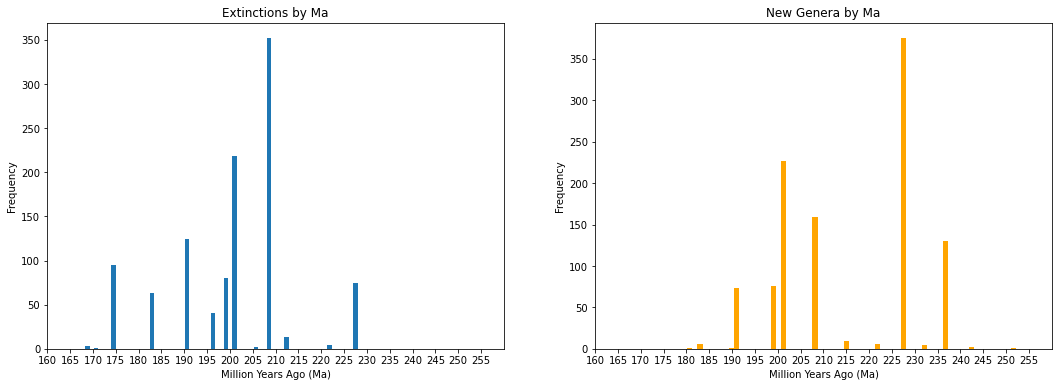

In [21]:
fig, axes = plt.subplots(figsize = (18,6), ncols = 2)
ax0 , ax1 = axes
ax0= gen.min_ma.plot(ax= ax0, kind = 'hist', title = 'Extinctions by Ma', xlabel = 'Million Years Ago (Ma)', bins = (237-174))
ax0.set_xlabel('Million Years Ago (Ma)')
ax0.set_xlim(160, 260)
ax0.set_xticks(range(160, 260, 5))
ax1 = gen.max_ma.plot(kind = 'hist', title = 'New Genera by Ma', xlabel = 'Million Years Ago (Ma)', bins = (237-174), color = 'orange')
ax1.set_xlabel('Million Years Ago (Ma)')
ax1.set_xlim(160, 260)
ax1.set_xticks(range(160, 260, 5));

### Notes: A few signals pop out quite clearly here. Most notably, the loss of a vast number of species before the ETE, which takes place at 201Ma. The apparent mass extinction at ~208Ma comes with the end of the Norian Period. While the massive increase in diversity at around 227 is its start. 

#### This reveals a flaw in experiment design:
#### In the absence of catastrophic changes, it is hard to tell when a species goes extinct. Those genera not alive before or after the Norian but abundant during the middle are thus given a maximum possible genera lifespan bounded by the two ends of the period


#### With that being said, It is worth taking a look at the Norian Biota to see which groups were abundant

In [22]:
norian = gen[gen.time_bins == 'Norian']
norian['class'].describe()

# There is a single mammal genera in the dataset, since they are outside the scope of this project, we will ignore it

norian = norian.drop(index = 778597)

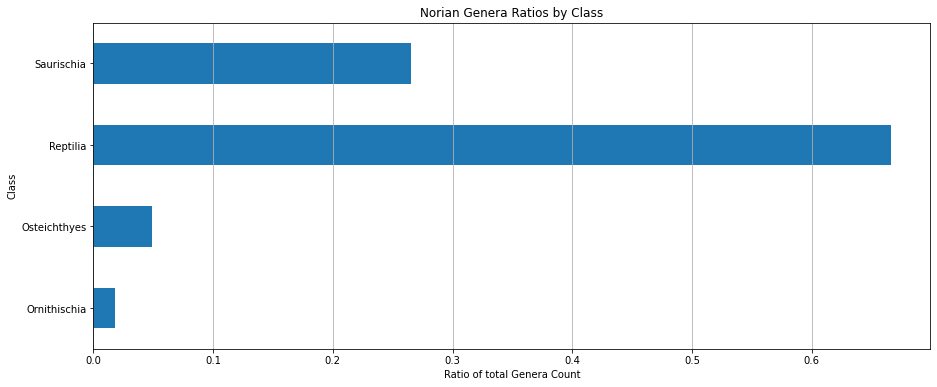

In [23]:
fig = (norian.groupby('class').accepted_name.count() / 452).plot(kind = 'barh', title = 'Norian Genera Ratios by Class', 
                                                           xlabel = 'Class', figsize = (15, 6))
fig.set_xlabel('Ratio of total Genera Count')
fig.grid(which='major', axis = 'x')

#### Notes: while saurischian and ornithischian dinosaurs had both begun to arrive on the scene, the ecosystems of the Norian were dominated by reptiles. Crocodile like Rausiuchain species filled nearly every ecological niche. But how does this change over time? First, Let's compare the Carnian, Rhaetian, and the Norian. The three Ages of the Triassic:


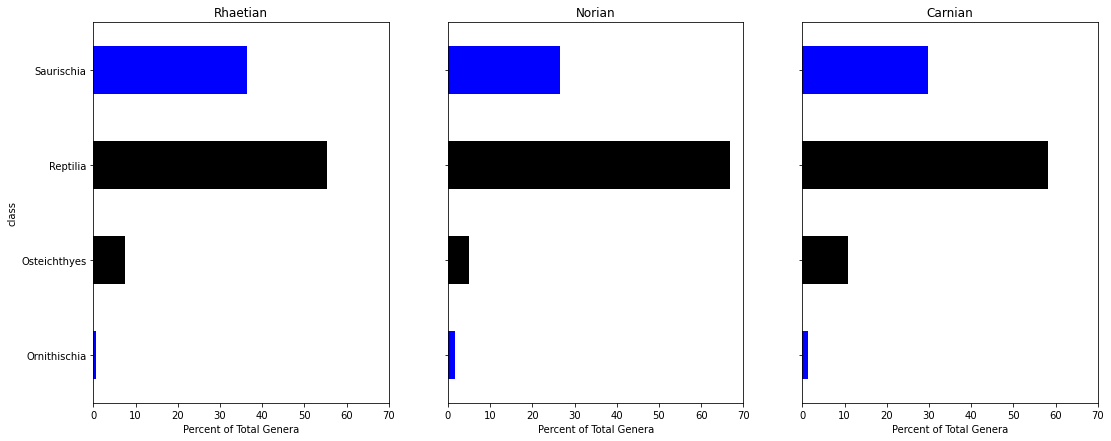

In [24]:
rhaetian = gen[gen.time_bins == 'Rhaetian']
carnian = gen[gen.time_bins=='Carnian']

nor_rats = norian.groupby('class').accepted_name.count() / norian['class'].count() * 100
rhae_rats = rhaetian.groupby('class').accepted_name.count() / rhaetian['class'].count() * 100
carn_rats = carnian.groupby('class').accepted_name.count()  / carnian['class'].count() * 100

fig , axes = plt.subplots(ncols = 3, figsize = (18, 7))
ax0 , ax1, ax2 = axes
plt.title('Triassic Agewise Genera Distributions Percentages')
ax0.set_xlabel('Percent of Total Genera')
ax1.set_xlabel('Percent of Total Genera')
ax2.set_xlabel('Percent of Total Genera')
rhae_rats.plot(ax=axes[0], kind='barh', stacked = True, title = 'Rhaetian', xlim=(0, 70), color = ['blue', 'black', 'black', 'blue'])
carn_rats.plot(ax = axes[2], kind = 'barh', stacked = True, title = 'Carnian', xlim=(0, 70), color = ['blue', 'black', 'black', 'blue' ],)
nor_rats.plot(ax = axes[1], kind = 'barh', stacked = True, title = 'Norian', xlim=(0, 70), color = ['blue', 'black', 'black', 'blue' ])
ax1.set_yticklabels([])
ax1.set_ylabel('' )
ax2.set_yticklabels([])
ax2.set_ylabel('' );


Notes: The blue sections represent dinosaurian genera, while the black represents all other groups. The general trend throughout the Triassic is reptialian dominated ecosytems.

Even in the latest Triassic, the Rhaetian, the combination of both dinosaur classes does not outweigh the reptilian hold on the ecosystem. Looking at this trend across the extinction boundary could reveal fruitful information about who went extinct and why.

In [25]:
gen.time_bins.unique()

array(['Rhaetian', 'Sinemurian', 'Norian', 'Carnian', '-', 'Toarcian',
       'Hettangian', 'Pliensbachian'], dtype=object)

''

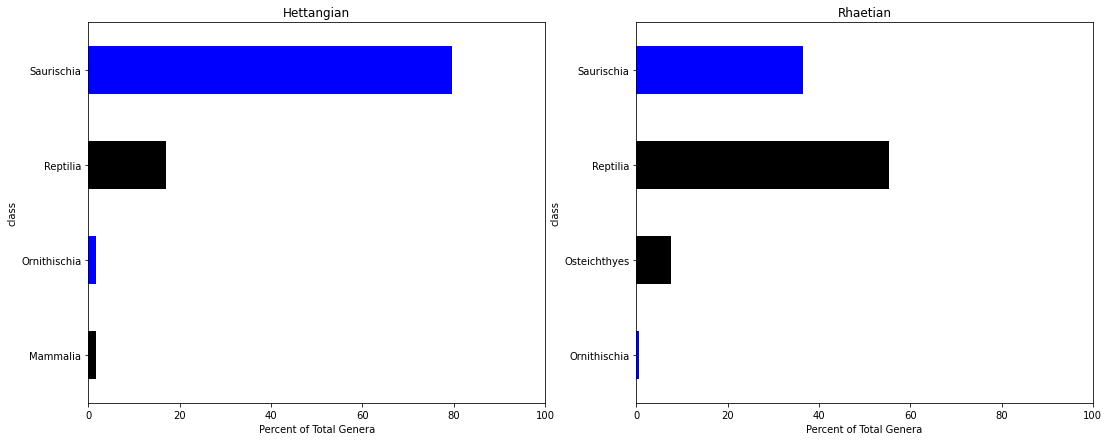

In [26]:
hettangian = gen[gen.time_bins == 'Hettangian']

het_rats = hettangian.groupby('class').accepted_name.count() / hettangian['class'].count() * 100

fig , axes = plt.subplots(ncols = 2, figsize = (18, 7))
ax0 , ax1 = axes
plt.title('Traissic-Jurassic Boundary Classwise Genera Ratios')
ax0.set_xlabel('Percent of Total Genera')
ax1.set_xlabel('Percent of Total Genera')
het_rats.plot(ax=axes[0], kind = 'barh', stacked = True, title = 'Hettangian', xlim=(0,100), color = ['black', 'blue', 'black', 'blue'])
rhae_rats.plot(ax=axes[1], kind='barh', stacked = True, title = 'Rhaetian', xlim=(0, 100), color = ['blue', 'black', 'black', 'blue'])
;

#### Notes: Across the Triassic-Jurassic boundary, in a near immediate shift, Dinosaurs by and large replace the reptilian land fauna. While the ornithischians are still few in number, the saurisichians, which inlude both the meat eating theropods and the long necked sauropod dinosaurs become the dominant faunal group, with a higher percentage of total genera than the reptilian fauna had at any point during the Triassic. The near total ecossytem re-wiring is indicative that the age of the Dinosaurs truly begins here at the End Triassic. Also of note is the complete disapearance of the Osteichthyes, synapsid stem mammals that dominated the Permian and held on through the Triassic. In the shade of towering new dinosaurs, the first mammalians began to truly establish a footing in the Jurassic World.

## Part 2: Geographic Analysis

The shift at the Triassic Jurassic Boundary, as seen in the above figure, is the change in diversity that is most intersting to me. While as we saw above, there was a massive species turnover in the Norian, with a great number of species appearing and then disappearing at the period's end, it was not accompanied by any substantial changes in ecosystem makeup. Across the end Trissic boundary however, this  story changes. I want to understand where the dinosaurs were coming from and how their distribution changed at this boundary using the lat long data associated with each entry.

In [27]:
import cartopy.crs as ccrs
import cartopy

# First we will look at the rhaeetian world

# to do so we have to seperate the rhaetian dataset into two groups, dinosaurs and others

rh_dinos = rhaetian[rhaetian['class']=='Saurischia']
rh_dinos = rh_dinos.append(rhaetian[rhaetian['class']=='Ornithischia'])
rh_non = rhaetian[rhaetian['class']=='Reptilia']
rh_non = rh_non.append(rhaetian[rhaetian['class']=='Osteichthyes'])

#now that I have the groups, I will plot the localities they were collected at
# For Expecdiency, we will do the same with Hettangian Fauna

het_dinos = hettangian[hettangian['class']=='Saurischia']
het_dinos = het_dinos.append(hettangian[hettangian['class']=='Ornithischia'])
het_non = hettangian[hettangian['class']=='Reptilia']
het_non = het_non.append(hettangian[hettangian['class']=='Mammalia'])

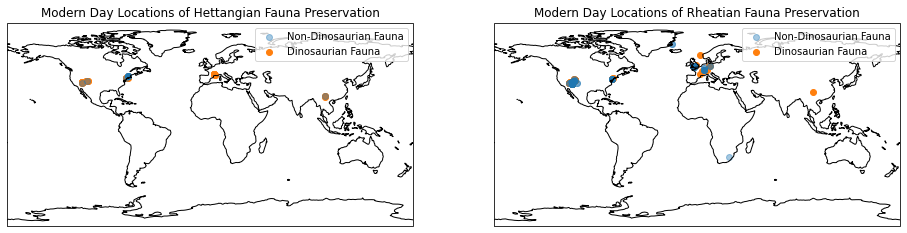

In [28]:
fig, axes = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (16,10), ncols = 2)
ax0, ax1 = axes
ax1.coastlines()
ax1.scatter(rh_non.lng, rh_non.lat, alpha = .4, label = 'Non-Dinosaurian Fauna')
ax1.scatter(rh_dinos.lng, rh_dinos.lat, zorder=0, alpha = 1, label = 'Dinosaurian Fauna')
ax1.set_global()
ax1.set_title('Modern Day Locations of Rheatian Fauna Preservation')
ax1.legend()
ax0.coastlines()
ax0.scatter(het_non.lng, het_non.lat, alpha = .4,label = 'Non-Dinosaurian Fauna')
ax0.scatter(het_dinos.lng, het_dinos.lat, zorder=0, alpha = 1, label = 'Dinosaurian Fauna')
ax0.set_title('Modern Day Locations of Hettangian Fauna Preservation')
ax0.set_global()
ax0.legend();

This does not, by and large, give us any useful information other than the locations of Triassic/Jurassic formations around the world. With the exception of the delightful fact that New Jeresy is an excellent place, in the grand scheme of things, to hunt for such fossils. A much more useful query would be to look at the paleo-coordinates. This may be more of a challenge. Accurate plate projections are hard to find, but the paleodb dataset inherently includes modeled co-ordinates so we may have a shot.

In [32]:
#the first part is easy, we follow relatively the same rworkflow as the last plot:
!wget https://github.com/bslibeck/RCES_Final_Project/blob/main/end_triassic_world_trimmed.png?raw=true
fname = 'end_triassic_world_trimmed.png?raw=true'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)
''' 
I uploaded a file to Github with the map projection of Pangea I will  be using. The map was created and published by "Plate tectonic maps and Continental drift animations by C. R. Scotese,
 PALEOMAP Project (www.scotese.com)", its licensce includes free use for educational purposes
 
'''


--2021-12-13 02:48:27--  https://github.com/bslibeck/RCES_Final_Project/blob/main/end_triassic_world_trimmed.png?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bslibeck/RCES_Final_Project/raw/main/end_triassic_world_trimmed.png [following]
--2021-12-13 02:48:27--  https://github.com/bslibeck/RCES_Final_Project/raw/main/end_triassic_world_trimmed.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bslibeck/RCES_Final_Project/main/end_triassic_world_trimmed.png [following]
--2021-12-13 02:48:27--  https://raw.githubusercontent.com/bslibeck/RCES_Final_Project/main/end_triassic_world_trimmed.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubu

' \nI uploaded a file to Github with the map projection of Pangea I will  be using. The map was created and published by "Plate tectonic maps and Continental drift animations by C. R. Scotese,\n PALEOMAP Project (www.scotese.com)", its licensce includes free use for educational purposes\n \n'

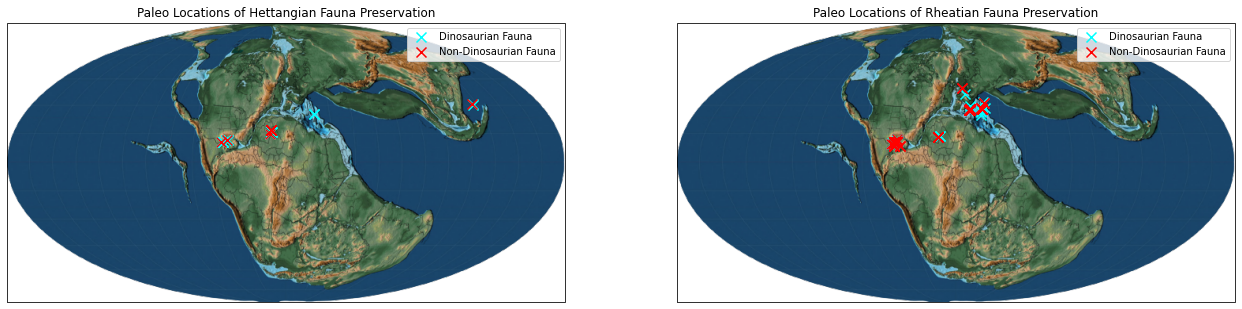

In [34]:
fname = 'end_triassic_world_trimmed.png?raw=true'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)
fig, axes = plt.subplots(subplot_kw={'projection': ccrs.Mollweide(central_longitude=0, globe=None)}, figsize = (22,24), ncols = 2)
ax0, ax1 = axes
ax1.imshow(img, origin = 'upper', extent = img_extent)
ax1.scatter(rh_dinos.paleolng, rh_dinos.paleolat, zorder=2, alpha = 1, label = 'Dinosaurian Fauna', transform = ccrs.Mollweide(), color = 'Cyan', marker = 'x', s=100)
ax1.scatter(rh_non.paleolng, rh_non.paleolat, zorder = 3, alpha = 1, label = 'Non-Dinosaurian Fauna', transform = ccrs.Mollweide(), color = 'red', marker = 'x', s=100)
ax1.set_title('Paleo Locations of Rheatian Fauna Preservation')
ax1.legend()

ax0.imshow(img, origin = 'upper', extent = img_extent)
ax0.scatter(het_dinos.paleolng, het_dinos.paleolat, zorder=2, alpha = 1, label = 'Dinosaurian Fauna', transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax0.scatter(het_non.paleolng, het_non.paleolat, zorder=3, alpha = 1,label = 'Non-Dinosaurian Fauna', transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)

ax0.set_title('Paleo Locations of Hettangian Fauna Preservation')
ax0.legend();

There isn't a clear transition across the boundary here, but maybe by expanding our frame to look at the full early Jurassic and Late Triassic, a movement trend may become more clear. 

In [35]:
pliensbachian = gen[gen.time_bins == 'Pliensbachian']
toarcian = gen[gen.time_bins == 'Toarcian']
sinemurian = gen[gen.time_bins == 'Sinemurian']

car_dinos = carnian[carnian['class']=='Saurischia']
car_dinos = car_dinos.append(carnian[carnian['class']=='Ornithischia'])
car_non = carnian[carnian['class']=='Reptilia']
car_non = car_non.append(carnian[carnian['class']=='Osteichthyes'])

nor_dinos = norian[norian['class']=='Saurischia']
nor_dinos = nor_dinos.append(norian[norian['class']=='Ornithischia'])
nor_non = norian[norian['class']=='Reptilia']
nor_non = nor_non.append(norian[norian['class']=='Osteichthyes'])

pli_dinos = pliensbachian[pliensbachian['class']=='Saurischia']
pli_dinos = pli_dinos.append(pliensbachian[pliensbachian['class']=='Ornithischia'])
pli_non = pliensbachian[pliensbachian['class']=='Reptilia']
pli_non = pli_non.append(pliensbachian[pliensbachian['class']=='Mammalia'])

tor_dinos = toarcian[toarcian['class']=='Saurischia']
tor_dinos = tor_dinos.append(toarcian[toarcian['class']=='Ornithischia'])
tor_non = toarcian[toarcian['class']=='Reptilia']
tor_non = tor_non.append(toarcian[toarcian['class']=='Mammalia'])

sin_dinos = sinemurian[sinemurian['class']=='Saurischia']
sin_dinos = sin_dinos.append(sinemurian[sinemurian['class']=='Ornithischia'])
sin_non = sinemurian[sinemurian['class']=='Reptilia']
sin_non = sin_non.append(sinemurian[sinemurian['class']=='Mammalia'])



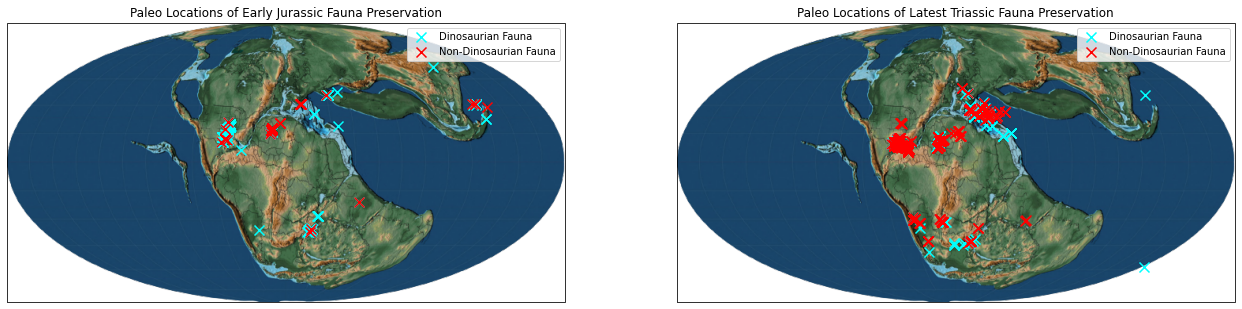

In [37]:
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)
fig, axes = plt.subplots(subplot_kw={'projection': ccrs.Mollweide(central_longitude=0, globe=None)}, figsize = (22,24), ncols = 2)
ax0, ax1 = axes

ax0.imshow(img, origin = 'upper', extent = img_extent)
ax0.set_title('Paleo Locations of Early Jurassic Fauna Preservation')
ax0.scatter(het_dinos.paleolng, het_dinos.paleolat, zorder=2, alpha = 1, label = 'Dinosaurian Fauna', transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax0.scatter(het_non.paleolng, het_non.paleolat, zorder=3, alpha = 1,label = 'Non-Dinosaurian Fauna', transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax0.scatter(pli_dinos.paleolng, pli_dinos.paleolat, zorder=2, alpha = 1, transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax0.scatter(pli_non.paleolng, pli_non.paleolat, zorder=3, alpha = 1, transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax0.scatter(tor_dinos.paleolng, tor_dinos.paleolat, zorder=2, alpha = 1, transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax0.scatter(tor_non.paleolng, tor_non.paleolat, zorder=3, alpha = 1, transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax0.scatter(sin_dinos.paleolng, sin_dinos.paleolat, zorder=2, alpha = 1, transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax0.scatter(sin_non.paleolng, sin_non.paleolat, zorder=3, alpha = 1, transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax0.legend()


ax1.imshow(img, origin = 'upper', extent = img_extent)
ax1.set_title('Paleo Locations of Latest Triassic Fauna Preservation')
ax1.scatter(rh_dinos.paleolng, rh_dinos.paleolat, zorder=2, alpha = 1, label = 'Dinosaurian Fauna', transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax1.scatter(rh_non.paleolng, rh_non.paleolat, zorder=3, alpha = 1,label = 'Non-Dinosaurian Fauna', transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax1.scatter(car_dinos.paleolng, car_dinos.paleolat, zorder=2, alpha = 1, transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax1.scatter(car_non.paleolng, car_non.paleolat, zorder=3, alpha = 1, transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax1.scatter(nor_dinos.paleolng, nor_dinos.paleolat, zorder=2, alpha = 1, transform = ccrs.Mollweide(), color='Cyan', marker = 'x', s=100)
ax1.scatter(nor_non.paleolng, nor_non.paleolat, zorder=3, alpha = 1, transform = ccrs.Mollweide(), color='red', marker = 'x', s=100)
ax1.legend();


#### While the areas with any fossils preserved at all are few and far between, there is clearly a replacement of Non-Dinosaurian fauna with dinosaurs between the two periods. I am not convinced the paleolat/lon data worked quite as well as I would've liked, as the projection seems slightly off, but I think the larger issue with this is that it would require a dynamic image of the earth's dynamic tectonic history. I could probably do this with an animation, but that is beyond my capabilities. Furthermore, reading the documentation for the paleo_lat/paleo_lon data revealed that wherever genera have a habitat which encompasses a range, as most of these groups probably do, the midpoint is taken. This dataset is also heavily biased towards the Norian Fauna, which are very well preserved in a few locaitons, which is why the Triassic graph looks so much more populated.

#### All in all, I think the scope of the question I set out to answer was perhaps too broad for this project, but it was a worthwhile exercise that does emphasize the severity of the End Triassic and its importance for dinosaurian dominance in the Mesozoic.

## Next Steps:
I need to find a way to better analyze species diversity through time on a continous basis, rather than as distinct endpoints.